<h2>Generate Images from existing Edelgan model</h2>

In [7]:
from PIL import Image as Img
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot as plt

In [14]:
def generate_latent_points(latent_dim, nbpoints):
    random_points = randn(latent_dim * nbpoints)
    random_points = random_points.reshape((nbpoints, latent_dim))
    return random_points

def show_samples(model, n):
    pictures = model.predict(generate_latent_points(128, n*n))
    plt.figure(figsize=(30,30))
    for i in range(n*n):
        plt.subplot(n,n, i+1)
        plt.axis("off")
        plt.imshow((pictures[i]+1)/2)
    plt.show()
    plt.savefig("result_wall.png")

In [9]:
model = load_model("checkpoints/gene_check12.h5")

C:\Users\Shadow\AppData\Roaming\Python\Python37\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [10]:
demonstration = model.predict(generate_latent_points(128, 100))

for i,face in enumerate(demonstration):
    face = ((face+1)*127.5).astype("uint8")
    Img.fromarray(face).save(f"res/face{i}.png")

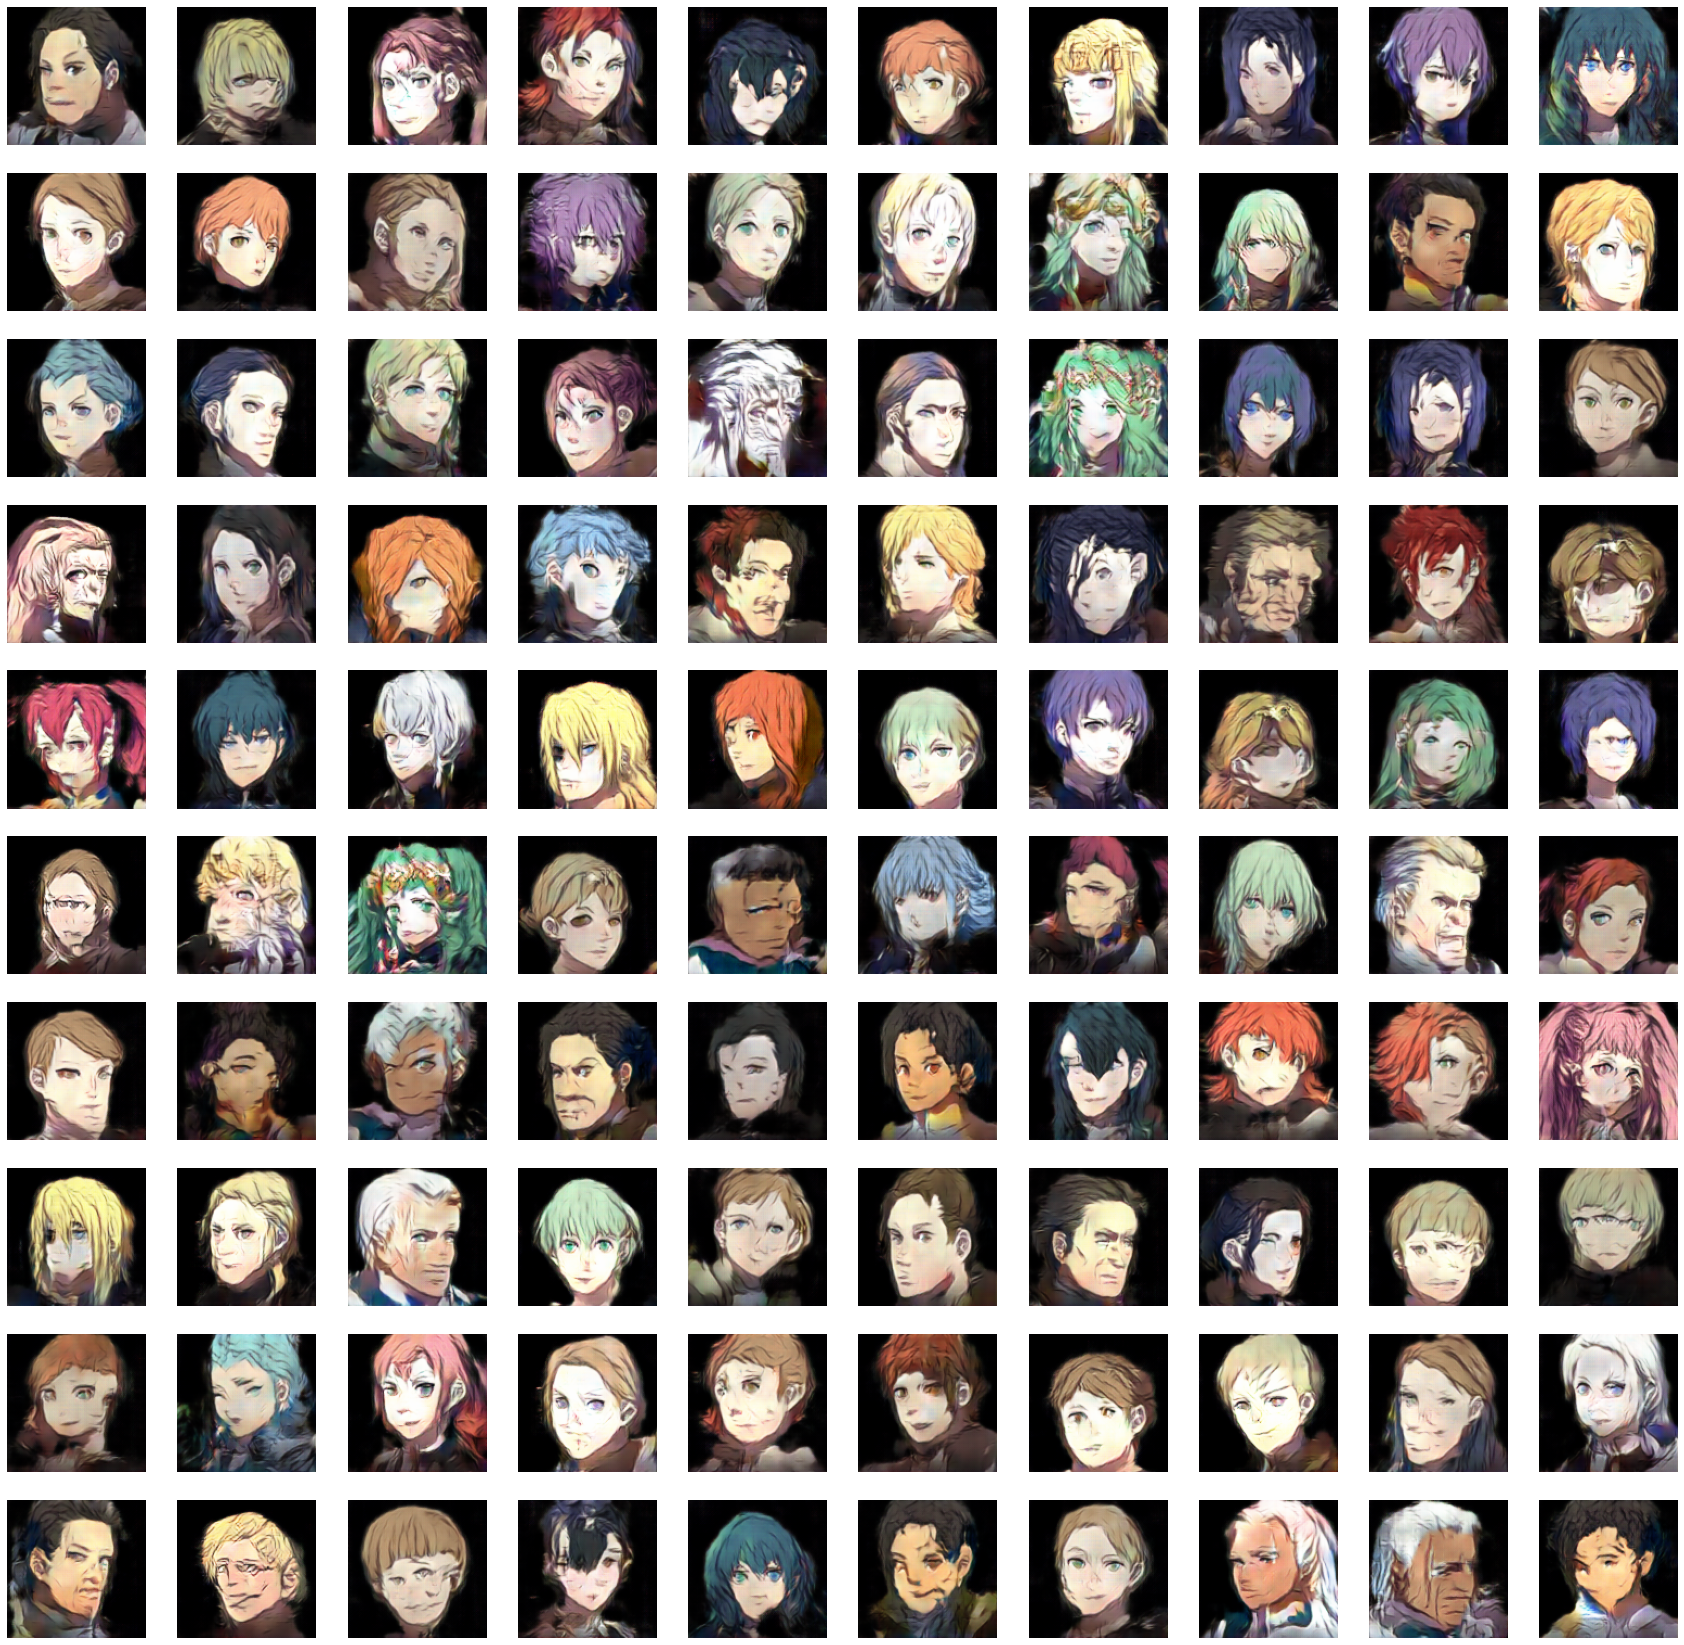

<Figure size 432x288 with 0 Axes>

In [15]:
show_samples(model, 10)